# Imports utilized

In [181]:
import matplotlib.pyplot as plt
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
 

import pandas as pd
import geopandas as gpd
import maup
from maup.smart_repair import smart_repair

# Vest Shape File

### These files will provide the information regarding presidential election by precincts

In [182]:
precinct1_df = gpd.read_file('./in_vest_20/in_vest_20.shp')
precinct2_df = gpd.read_file('./in_vest_16_corrected/IN_vest_16.shp')

### Information inside this shapefile:

In [183]:
precinct1_df

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20GOVRHOL,G20GOVDMYE,G20GOVLRAI,G20ATGRROK,G20ATGDWEI,geometry
0,18,123,000200,18123000200,TROY TOWNSHIP 01,538,367,12,580,277,53,487,402,"POLYGON ((-86.80477 37.99381, -86.80435 37.993..."
1,18,123,000190,18123000190,TROY,91,59,4,90,49,12,81,65,"POLYGON ((-86.81450 37.99871, -86.81355 37.998..."
2,18,123,000140,18123000140,TELL CITY 05,263,203,10,275,171,27,232,228,"POLYGON ((-86.77842 37.95835, -86.77832 37.958..."
3,18,123,000160,18123000160,TELL CITY 07,207,185,9,219,158,21,182,207,"POLYGON ((-86.78400 37.97424, -86.78236 37.974..."
4,18,123,000010,18123000010,ANDERSON,531,263,14,565,192,51,440,347,"POLYGON ((-86.80715 38.11784, -86.80709 38.117..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,18,057,000500,18057000500,DELAWARE 16,339,463,17,436,327,54,377,421,"POLYGON ((-86.04902 39.94159, -86.04978 39.940..."
5162,18,057,000110,18057000110,BRIAR CREEK,298,293,11,369,189,48,345,244,"POLYGON ((-86.11229 39.92690, -86.11229 39.926..."
5163,18,057,000080,18057000080,BLUE CREEK,325,409,19,441,258,48,384,343,"POLYGON ((-86.09824 39.94130, -86.09824 39.940..."
5164,18,057,000850,18057000850,FALL CREEK 21,598,480,17,762,282,58,667,403,"POLYGON ((-85.93651 39.92741, -85.93759 39.927..."


In [133]:
precinct2_df

,COUNTY,P16,C,S,H,G16PRERTRU,G16PREDCLI,G16PRELJOH,G16PREOWRI,G16USSRYOU,...,G16USSOWRI,G16GOVRHOL,G16GOVDGRE,G16GOVLBEL,G16GOVOWRI,G16ATGRHIL,G16ATGDARR,G16SPIRMCC,G16SPIDRIT,geometry
0,007,BOLIVAR,004,006,013,306,109,38,4,283,...,0,289,147,23,0,343,107,278,175,"POLYGON ((492045.674 4482285.273, 492045.759 4..."
1,007,CENTER EAST,004,006,013,221,78,16,4,197,...,0,198,112,10,0,231,81,200,119,"POLYGON ((474820.136 4499914.589, 474894.534 4..."
2,007,CENTER NORTH,004,006,013,153,59,20,1,141,...,0,147,73,13,0,167,56,143,90,"POLYGON ((472960.243 4496390.299, 472959.998 4..."
3,007,CENTER SOUTH,004,006,013,233,86,12,6,220,...,0,208,107,17,0,249,72,199,125,"POLYGON ((482345.928 4490180.517, 482334.413 4..."
4,007,CENTER WEST,004,006,013,166,83,7,0,147,...,0,151,99,3,0,181,66,143,108,"POLYGON ((473801.812 4496370.973, 473876.671 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,091,MC 24 (NV),001,004,009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((505596.252 4617601.243, 505595.117 4..."
5374,091,MC 09,001,004,009,63,295,16,5,47,...,0,52,296,14,0,65,289,65,286,"POLYGON ((505596.252 4617601.243, 505596.252 4..."
5375,091,UNION,002,008,020,252,107,21,1,206,...,0,192,159,16,0,241,121,230,135,"POLYGON ((529865.354 4586847.554, 529865.354 4..."
5376,091,COOLSPRING 04,001,004,009,513,410,47,16,421,...,0,394,536,38,0,481,458,473,468,"POLYGON ((505635.779 4611251.038, 505635.563 4..."


### Read the rest of the files

vap_Blocks_df carries data(from the census) of the voting age population<br>
tot_Blocks_df carries data of the total population in blocks<br>
cong_df is the shapefile of the congressional districts<br>

In [184]:
vap_Blocks_df = gpd.read_file('./in_pl2020_b/in_pl2020_p3_b.shp')
tot_Blocks_df = gpd.read_file('./in_pl2020_b/in_pl2020_p2_b.shp')
cong_df = gpd.read_file('./in_cong_adopted_2021/Congressional2021AdoptedOCT012021.shp')

In [185]:
vap_Blocks_df

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0030001,P0030002,P0030003,P0030004,P0030005,...,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,geometry
0,180390016023026,750,0154282,7500000US180390016023026,039,8,8,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.98092 41.73830, -85.98087 41.738..."
1,180390020023021,750,0155080,7500000US180390020023021,039,23,18,14,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.89284 41.62477, -85.89266 41.625..."
2,180390021022020,750,0155221,7500000US180390021022020,039,25,20,13,1,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.95934 41.66548, -85.95910 41.665..."
3,181319589001013,750,0266077,7500000US181319589001013,131,23,23,23,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.56339 41.15959, -86.56337 41.161..."
4,181499537002016,750,0285813,7500000US181499537002016,149,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.67847 41.38992, -86.67844 41.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204563,181670009002070,750,0301387,7500000US181670009002070,167,11,10,10,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41549 39.48547, -87.41549 39.485..."
204564,181670003002034,750,0300551,7500000US181670003002034,167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.40779 39.48166, -87.40752 39.481..."
204565,181670105003027,750,0303995,7500000US181670105003027,167,16,15,15,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.44603 39.46517, -87.44532 39.465..."
204566,181670003002040,750,0300557,7500000US181670003002040,167,3,3,1,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41060 39.48064, -87.41029 39.480..."


In [186]:
tot_Blocks_df

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0020001,P0020002,P0020003,P0020004,P0020005,...,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,geometry
0,180390016023026,750,0154282,7500000US180390016023026,039,10,1,9,8,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.98092 41.73830, -85.98087 41.738..."
1,180390020023021,750,0155080,7500000US180390020023021,039,26,7,19,16,14,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.89284 41.62477, -85.89266 41.625..."
2,180390021022020,750,0155221,7500000US180390021022020,039,29,16,13,11,10,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.95934 41.66548, -85.95910 41.665..."
3,181319589001013,750,0266077,7500000US181319589001013,131,32,0,32,32,32,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.56339 41.15959, -86.56337 41.161..."
4,181499537002016,750,0285813,7500000US181499537002016,149,5,2,3,3,3,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.67847 41.38992, -86.67844 41.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204563,181670009002070,750,0301387,7500000US181670009002070,167,17,0,17,15,15,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41549 39.48547, -87.41549 39.485..."
204564,181670003002034,750,0300551,7500000US181670003002034,167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.40779 39.48166, -87.40752 39.481..."
204565,181670105003027,750,0303995,7500000US181670105003027,167,32,0,32,31,31,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.44603 39.46517, -87.44532 39.465..."
204566,181670003002040,750,0300557,7500000US181670003002040,167,5,2,3,3,1,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41060 39.48064, -87.41029 39.480..."


Data set contains 9 rows, which matches the # of congressional districts Indiana has

In [187]:
cong_df

,ID,DISTRICT,DISTRICTN,geometry
0,1,1,1,"POLYGON ((-87.52556 41.52265, -87.52556 41.522..."
1,2,2,2,"POLYGON ((-86.35029 40.62773, -86.35027 40.628..."
2,3,3,3,"POLYGON ((-85.77254 41.19435, -85.77050 41.195..."
3,4,4,4,"POLYGON ((-86.46490 39.33829, -86.46511 39.338..."
4,5,5,5,"POLYGON ((-86.24038 39.92605, -86.24050 39.926..."
5,6,6,6,"POLYGON ((-85.79971 39.12745, -85.80020 39.127..."
6,7,7,7,"POLYGON ((-86.10043 39.71584, -86.10081 39.716..."
7,8,8,8,"POLYGON ((-87.91672 38.15664, -87.91518 38.157..."
8,9,9,9,"POLYGON ((-86.27674 38.23408, -86.27662 38.237..."


# Cleaning the files
Utilizing maup, we can assign the congressional districts to the precincts<br>
But first, utilize maup.doctor to ensure the geometry is correct; True means no problems <br>
code from: https://pypi.org/project/maup/ 

In [188]:
maup.doctor(cong_df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True

Utilizing smart_repair just in case; if true, 0 gaps should appear

In [138]:
repairedCong = cong_df
repairedCong = repairedCong.to_crs(repairedCong.estimate_utm_crs())
cong_df = smart_repair(repairedCong)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Library/Frameworks/Python.framework/Ver

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...
Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


### Precinct file repair
Precinct files tend to have many errors(https://pypi.org/project/maup/); run a smart_repair on the file before combining the assignment between congressional districts and precincts <br>
This may take some time


In [189]:
repaired_Precincts2020 = precinct1_df
repaired_Precincts2020 = repaired_Precincts2020.to_crs(repaired_Precincts2020.estimate_utm_crs())
precinct1_df = smart_repair(repaired_Precincts2020)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Library/Frameworks/Python.framework/Ver

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = pieces_df["polygon indices"][i].union({j})


Resolving overlaps...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_po

Assigning order 2 pieces...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:563: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][poly_to_add_to] = unary_union(


Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|          | 0/741 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[h_ind] = orie

In [140]:
maup.doctor(precinct1_df)

True

### Cleaning census data
First, renaming some of the standard naming convention(https://redistrictingdatahub.org/data/about-our-data/pl-94171-dataset/fields-and-descriptions/)

In [190]:
vap_Blocks_df = vap_Blocks_df.rename(columns = {
    "P0030001" : "VAP_TOT20"
})

tot_Blocks_df = tot_Blocks_df.rename(columns = {
    "P0020001" : "ALL_TOT20"
})

In [191]:
precinct1_df = precinct1_df.rename(columns = {
    "G20PREDBID" : "PRES20D",
    "G20PRERTRU" : "PRES20R"
})

precinct2_df = precinct2_df.rename(columns = {
    "G16PRERTRU" : "PRES16R",	
    "G16PREDCLI" : "PRES16D"
})

### Combining Block data

In [192]:
blocks_df = tot_Blocks_df
vapblock = vap_Blocks_df

blocks_df["VAP_TOT20"] = vapblock["VAP_TOT20"]

In [193]:
blocks_df

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,ALL_TOT20,P0020002,P0020003,P0020004,P0020005,...,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,geometry,VAP_TOT20
0,180390016023026,750,0154282,7500000US180390016023026,039,10,1,9,8,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-85.98092 41.73830, -85.98087 41.738...",8
1,180390020023021,750,0155080,7500000US180390020023021,039,26,7,19,16,14,...,0,0,0,0,0,0,0,0,"POLYGON ((-85.89284 41.62477, -85.89266 41.625...",23
2,180390021022020,750,0155221,7500000US180390021022020,039,29,16,13,11,10,...,0,0,0,0,0,0,0,0,"POLYGON ((-85.95934 41.66548, -85.95910 41.665...",25
3,181319589001013,750,0266077,7500000US181319589001013,131,32,0,32,32,32,...,0,0,0,0,0,0,0,0,"POLYGON ((-86.56339 41.15959, -86.56337 41.161...",23
4,181499537002016,750,0285813,7500000US181499537002016,149,5,2,3,3,3,...,0,0,0,0,0,0,0,0,"POLYGON ((-86.67847 41.38992, -86.67844 41.393...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204563,181670009002070,750,0301387,7500000US181670009002070,167,17,0,17,15,15,...,0,0,0,0,0,0,0,0,"POLYGON ((-87.41549 39.48547, -87.41549 39.485...",11
204564,181670003002034,750,0300551,7500000US181670003002034,167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-87.40779 39.48166, -87.40752 39.481...",0
204565,181670105003027,750,0303995,7500000US181670105003027,167,32,0,32,31,31,...,0,0,0,0,0,0,0,0,"POLYGON ((-87.44603 39.46517, -87.44532 39.465...",16
204566,181670003002040,750,0300557,7500000US181670003002040,167,5,2,3,3,1,...,0,0,0,0,0,0,0,0,"POLYGON ((-87.41060 39.48064, -87.41029 39.480...",3


### Assign blocks to precincts

In [194]:
blocks_df = blocks_df.to_crs(blocks_df.estimate_utm_crs())
precinct2_df = precinct2_df.to_crs(precinct2_df.estimate_utm_crs())

b_to_pr2020 = maup.assign(blocks_df.geometry, precinct1_df.geometry)
b_to_pr2016 = maup.assign(blocks_df.geometry, precinct2_df.geometry)

### Aggregate population data from blocks to precincts

In [213]:
blocks_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'ALL_TOT20',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P00

In [196]:
pop_cols = ['ALL_TOT20', "VAP_TOT20"]

In [197]:
precinct1_df[pop_cols] = blocks_df[pop_cols].groupby(b_to_pr2020).sum()

### Ensure the assignment worked

In [215]:
precinct1_df[pop_cols].head()

,ALL_TOT20,VAP_TOT20
0,1522.0,1176.0
1,347.0,270.0
2,1128.0,905.0
3,873.0,734.0
4,1603.0,1233.0


In [214]:
blocks_df[pop_cols].sum()

ALL_TOT20    6785528
VAP_TOT20    5192579
dtype: int64

In [216]:
precinct1_df[pop_cols].sum()

ALL_TOT20    6785528.0
VAP_TOT20    5192579.0
dtype: float64

### Assign CD to precincts

In [206]:
cong_df = cong_df.to_crs(cong_df.estimate_utm_crs())
blocks_to_districts_assignment = maup.assign(blocks_df.geometry, cong_df.geometry)
blocks_df["CD"] = blocks_to_districts_assignment

### Disaggregate votes to blocks using Voting Age Population

In [209]:
precinct1_df

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,PRES20R,PRES20D,G20PRELJOR,G20GOVRHOL,G20GOVDMYE,G20GOVLRAI,G20ATGRROK,G20ATGDWEI,geometry,ALL_TOT20,VAP_TOT20
0,18,123,000200,18123000200,TROY TOWNSHIP 01,538,367,12,580,277,53,487,402,"POLYGON ((517141.771 4205145.871, 517179.133 4...",1522.0,1176.0
1,18,123,000190,18123000190,TROY,91,59,4,90,49,12,81,65,"POLYGON ((517179.133 4205124.425, 517141.771 4...",347.0,270.0
2,18,123,000140,18123000140,TELL CITY 05,263,203,10,275,171,27,232,228,"POLYGON ((523300.911 4201007.260, 523330.960 4...",1128.0,905.0
3,18,123,000160,18123000160,TELL CITY 07,207,185,9,219,158,21,182,207,"POLYGON ((522039.492 4202075.122, 522042.708 4...",873.0,734.0
4,18,123,000010,18123000010,ANDERSON,531,263,14,565,192,51,440,347,"POLYGON ((520002.820 4205648.222, 519994.303 4...",1603.0,1233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,18,057,000500,18057000500,DELAWARE 16,339,463,17,436,327,54,377,421,"POLYGON ((579801.099 4420072.961, 579801.078 4...",1677.0,1399.0
5162,18,057,000110,18057000110,BRIAR CREEK,298,293,11,369,189,48,345,244,"POLYGON ((575855.687 4420021.215, 575855.687 4...",961.0,706.0
5163,18,057,000080,18057000080,BLUE CREEK,325,409,19,441,258,48,384,343,"POLYGON ((577350.440 4420033.952, 577267.296 4...",1144.0,808.0
5164,18,057,000850,18057000850,FALL CREEK 21,598,480,17,762,282,58,667,403,"POLYGON ((587087.247 4420164.103, 587087.247 4...",1699.0,1286.0


Assign weights to each block equal to the fraction of the total population of the blocks assigned to the precinct

In [217]:
elec2020_cols = ['PRES20D', 'PRES20R']

In [219]:
weights2020 = blocks_df["VAP_TOT20"] / b_to_pr2020.map(blocks_df["VAP_TOT20"].groupby(b_to_pr2020).sum())
weights2020 = weights2020.fillna(0)

prorated2020 = maup.prorate(b_to_pr2020, precinct1_df[elec2020_cols], weights2020)
blocks_df[elec2020_cols] = prorated2020

In [220]:
precinct1_df

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,PRES20R,PRES20D,G20PRELJOR,G20GOVRHOL,G20GOVDMYE,G20GOVLRAI,G20ATGRROK,G20ATGDWEI,geometry,ALL_TOT20,VAP_TOT20
0,18,123,000200,18123000200,TROY TOWNSHIP 01,538,367,12,580,277,53,487,402,"POLYGON ((517141.771 4205145.871, 517179.133 4...",1522.0,1176.0
1,18,123,000190,18123000190,TROY,91,59,4,90,49,12,81,65,"POLYGON ((517179.133 4205124.425, 517141.771 4...",347.0,270.0
2,18,123,000140,18123000140,TELL CITY 05,263,203,10,275,171,27,232,228,"POLYGON ((523300.911 4201007.260, 523330.960 4...",1128.0,905.0
3,18,123,000160,18123000160,TELL CITY 07,207,185,9,219,158,21,182,207,"POLYGON ((522039.492 4202075.122, 522042.708 4...",873.0,734.0
4,18,123,000010,18123000010,ANDERSON,531,263,14,565,192,51,440,347,"POLYGON ((520002.820 4205648.222, 519994.303 4...",1603.0,1233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,18,057,000500,18057000500,DELAWARE 16,339,463,17,436,327,54,377,421,"POLYGON ((579801.099 4420072.961, 579801.078 4...",1677.0,1399.0
5162,18,057,000110,18057000110,BRIAR CREEK,298,293,11,369,189,48,345,244,"POLYGON ((575855.687 4420021.215, 575855.687 4...",961.0,706.0
5163,18,057,000080,18057000080,BLUE CREEK,325,409,19,441,258,48,384,343,"POLYGON ((577350.440 4420033.952, 577267.296 4...",1144.0,808.0
5164,18,057,000850,18057000850,FALL CREEK 21,598,480,17,762,282,58,667,403,"POLYGON ((587087.247 4420164.103, 587087.247 4...",1699.0,1286.0


In [221]:
blocks_df[elec2020_cols].head()

,PRES20D,PRES20R
0,1.380586,2.200308
1,4.795509,10.937450
2,3.809914,2.970094
3,3.994891,9.664112
4,0.351020,1.208163


### Now do 2016

In [222]:
precinct2_df

,COUNTY,P16,C,S,H,PRES16R,PRES16D,G16PRELJOH,G16PREOWRI,G16USSRYOU,...,G16USSOWRI,G16GOVRHOL,G16GOVDGRE,G16GOVLBEL,G16GOVOWRI,G16ATGRHIL,G16ATGDARR,G16SPIRMCC,G16SPIDRIT,geometry
0,007,BOLIVAR,004,006,013,306,109,38,4,283,...,0,289,147,23,0,343,107,278,175,"POLYGON ((492045.674 4482285.273, 492045.759 4..."
1,007,CENTER EAST,004,006,013,221,78,16,4,197,...,0,198,112,10,0,231,81,200,119,"POLYGON ((474820.136 4499914.589, 474894.534 4..."
2,007,CENTER NORTH,004,006,013,153,59,20,1,141,...,0,147,73,13,0,167,56,143,90,"POLYGON ((472960.243 4496390.299, 472959.998 4..."
3,007,CENTER SOUTH,004,006,013,233,86,12,6,220,...,0,208,107,17,0,249,72,199,125,"POLYGON ((482345.928 4490180.517, 482334.413 4..."
4,007,CENTER WEST,004,006,013,166,83,7,0,147,...,0,151,99,3,0,181,66,143,108,"POLYGON ((473801.812 4496370.973, 473876.671 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,091,MC 24 (NV),001,004,009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((505596.252 4617601.243, 505595.117 4..."
5374,091,MC 09,001,004,009,63,295,16,5,47,...,0,52,296,14,0,65,289,65,286,"POLYGON ((505596.252 4617601.243, 505596.252 4..."
5375,091,UNION,002,008,020,252,107,21,1,206,...,0,192,159,16,0,241,121,230,135,"POLYGON ((529865.354 4586847.554, 529865.354 4..."
5376,091,COOLSPRING 04,001,004,009,513,410,47,16,421,...,0,394,536,38,0,481,458,473,468,"POLYGON ((505635.779 4611251.038, 505635.563 4..."


In [223]:
elec2016_cols = ['PRES16D', 'PRES16R']

In [224]:
weights2016 = blocks_df["VAP_TOT20"] / b_to_pr2016.map(blocks_df["VAP_TOT20"].groupby(b_to_pr2016).sum())
weights2016 = weights2016.fillna(0)

prorated2016 = maup.prorate(b_to_pr2016, precinct2_df[elec2016_cols], weights2016)
blocks_df[elec2016_cols] = prorated2016

In [225]:
blocks_df[elec2016_cols].head()

,PRES16D,PRES16R
0,1.214176,2.040062
1,3.596632,9.757017
2,3.277345,2.437526
3,3.289911,8.312899
4,0.383673,1.093878


### Ensuring the data is still clean

In [227]:
maup.doctor(blocks_df)

True

In [228]:
blocks_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'ALL_TOT20',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P00

### Resulting map:

<Axes: >

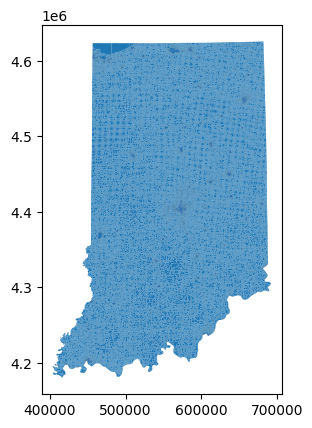

In [229]:
blocks_df.plot()

### Save the file to save time

In [237]:
blocks_df.to_file("./IN/IN.shp")
shp_file = gpd.read_file("./IN/IN.shp")
shp_file.to_file('./IN/IN.geojson', driver='GeoJSON')